In [1216]:
import cv2 as cv
import os
import numpy as np
import matplotlib.pyplot as plt
import math
import pdb

In [1262]:
img = cv.imread('full.png')
scale_percent = 1000 # percent of original size
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height)
img = cv.resize(img, dim, interpolation = cv.INTER_AREA)

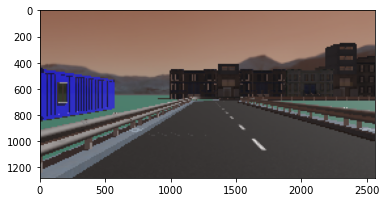

In [1263]:
plt.imshow(img)
plt.show()

In [1264]:
gray_image = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
img_hsv = cv.cvtColor(img, cv.COLOR_RGB2HSV)
lower_yellow = np.array([20, 100, 100], dtype = "uint8")
upper_yellow = np.array([30, 255, 255], dtype= "uint8")
mask_yellow = cv.inRange(img_hsv, lower_yellow, upper_yellow)
mask_white = cv.inRange(gray_image, 200, 255)
mask_yw = cv.bitwise_or(mask_white, mask_yellow)
mask_yw_image = cv.bitwise_and(gray_image, mask_yw)

In [1265]:
kernel_size = 5
gauss_gray = cv.GaussianBlur(img, (kernel_size, kernel_size), 0)

In [1266]:
low_threshold = 50
high_threshold = 150
canny_edges = cv.Canny(img, low_threshold, high_threshold)

In [1267]:
def region_of_interest(img, vertices):
    """
    Applies an image mask.
    
    Only keeps the region of the image defined by the polygon
    formed from `vertices`. The rest of the image is set to black.
    """
    #defining a blank mask to start with
    mask = np.zeros_like(img)   
    
    #defining a 3 channel or 1 channel color to fill the mask with depending on the input image
    if len(img.shape) > 2:
        channel_count = img.shape[2]  # i.e. 3 or 4 depending on your image
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255
        
    #filling pixels inside the polygon defined by "vertices" with the fill color    
    cv.fillPoly(mask, vertices, ignore_mask_color)
    
    #returning the image only where mask pixels are nonzero
    masked_image = cv.bitwise_and(img, mask)
    return masked_image

In [1268]:
imshape = img.shape
lower_left = [imshape[1]/4,imshape[0]]
lower_right = [imshape[1]-imshape[1]/4,imshape[0]]
top_left = [imshape[1]/2-imshape[1]/8,imshape[0]/2+imshape[0]/4]
top_right = [imshape[1]/2+imshape[1]/8,imshape[0]/2+imshape[0]/4]
vertices = [np.array([lower_left,top_left,top_right,lower_right],dtype=np.int32)]
roi_image = region_of_interest(canny_edges, vertices)

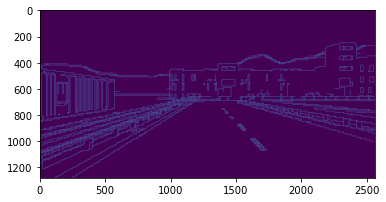

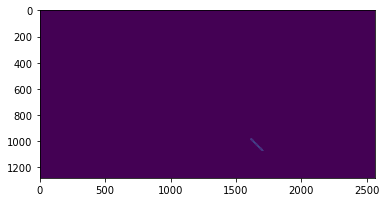

In [1269]:
plt.imshow(canny_edges)
plt.show()
plt.imshow(roi_image)
plt.show()

In [1270]:
rho = 4
theta = np.pi/180
threshold = 30
min_line_len = 10
max_line_gap = 180

lines = cv.HoughLinesP(roi_image, rho, theta, threshold, np.array([]), minLineLength=min_line_len, maxLineGap=max_line_gap)
# line_image = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
# result = cv2.addWeighted(initial_img, α, img, β, λ)

In [1271]:
if lines is not None:
    angles = []
    linez = []
    for l in lines:
        x1,y1,x2,y2 = l[0]
        linez.append([imshape[0],int(imshape[1]/2),x1,y1])
        angles.append(np.arctan2(-(y1-int(imshape[1]/2)),x1-imshape[0]))

In [1272]:
angles = np.array(angles)
linez = np.array(linez)

In [1273]:
zeroVals = np.argwhere(angles)
nonZeroAngles = []
for ind in zeroVals:
#     pdb.set_trace()
    x1,y1,x2,y2 = linez[ind][0]
        
    cv.line(img,(x1,y1),(x2,y2),(0,255,0),2)
    nonZeroAngles.append(angles[ind][0])

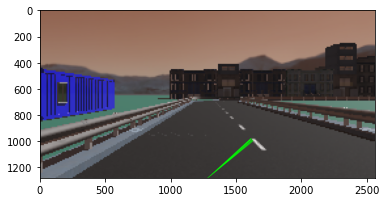

In [1274]:
plt.imshow(img)
plt.show()

In [1261]:
print('Straight Mean Angle: {}' .format(np.mean(nonZeroAngles)*180/np.pi))

Straight Mean Angle: 55.98847222736792


In [1233]:
print('Left Turn Angle: {}' .format(np.mean(nonZeroAngles)*180/np.pi))

Left Turn Angle: 126.16485739625482


In [1247]:
print('Right Turn Angle: {}' .format(np.mean(nonZeroAngles)*180/np.pi))

Right Turn Angle: 47.690041770847245


In [1275]:
print('Off Center Turn Angle: {}' .format(np.mean(nonZeroAngles)*180/np.pi))

Off Center Turn Angle: 41.292253642325434
